# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:
# Change working directory to the directory of the csv dataset file.
import os
# os.chdir('N:/DevMOOC/UdacityMLnd/P3Customer')
print os.getcwd()

N:\DevMOOC\UdacityMLnd\P3Customer


In [2]:
# Import libraries: NumPy, pandas, matplotlib.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA

# Tell iPython to include plots inline in the notebook.
%matplotlib inline

# Increase number of columns to be displayed.
pd.set_option("display.max_columns", 20)
pd.set_option('display.width', 800)

In [3]:
# Read dataset.
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns.\n" .format(*data.shape)

Dataset has 440 rows, 6 columns.



## Feature Transformation

- No scaling of the dataset is necessary in this particular case, since all features are measured in units of dollars.
- However, two different types of scaling will be applied to the dataset, so as to undrstand the method and benefits of scaling. 
- Row scaling will be applied by dividing each row by row-wise total. Information about row-wise totals can be retained in a separate vector. Row scaling is useful because it highlights information about ratios of values by features in each record. 
- Column scaling will be applied by using StandardScaler. Column scaling is essential when features have different units of measurements.

In [4]:
# Note: 'dataX = data' means dataX is a view of data. 'dataX = data.copy()' means dataX is a copy of data.

# No scaling: Copy the original dataset. Do not scale it.
dataN = data.copy()
print "No scaling:"
print dataN.head()
print "-" * 100

# Row scaling: Copy the original dataset. Scale it by dividing each row by row-wise total.
# (http://stackoverflow.com/questions/26537878/pandas-sum-across-columns-and-divide-each-cell-from-that-value)
dataR = data.copy()
dataR.loc[:, "Fresh":"Delicatessen"] = dataR.loc[:, "Fresh":"Delicatessen"].div(dataR.sum(axis=1), axis=0)
print "\nRow scaling:"
print dataR.head()
print "-" * 100

# Column scaling: Copy the original dataset. Scale it by using StandardScaler.
dataC = StandardScaler().fit_transform(data.copy())
print "\nColumn scaling:"
print dataC
print "-" * 100

No scaling:
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185
----------------------------------------------------------------------------------------------------

Row scaling:
      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  0.371394  0.283068  0.221652  0.006273          0.078389      0.039224
1  0.212139  0.294896  0.287621  0.052967          0.098990      0.053388
2  0.173532  0.240590  0.209888  0.065692          0.096039      0.214258
3  0.484460  0.043680  0.154158  0.233885          0.018516      0.065301
4  0.490564  0.117354  0.156139  0.084924          0.038547      0.112473
---------------------------------------------

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

#### Answer:
- The objective of PCA or ICA is to reduce the number of dimensions to be paid attention to while analyzing a dataset for making predictions.
- PCA and ICA are based on different assumptions of the pattern of data. PCA assumes that, and hence is applicable if, the data is a mixture of some “signals” and a substrate of Gaussian noise. ICA assumes that, and hence is applicable if, the data is made of non-Gaussian features.
- ICA becomes necessary when a given dataset does not adhere to the assuptions for PCA. 
- PCA and ICA achieve their objective differently. PCA utilizes the first and second moments of the available data. ICA utilizes higher moments.
- PCA is a three-step process.
- - (1) From the original (given) dataset, PCA creates a square matrix. Number of dimensions of this matrix equals the number of features of the original dataset. Elements of this matrix represent covariance of features. Each diagonal element of this matrix represents variance of a feature, and each off-diagonal element represents covariance of two different features.
- - (2) Thereafter, PCA applies a linear transformation to this matrix, and gets another square matrix. Number of dimensions of the new matrix equals the number of features of the original dataset. Elements of the new matrix represent covariance of “transformed features” (that is, features derived by a transformation of the original features). First few diagonal elements have high values; they are ordered in descending order; they correspond to the “signals of importance”. Subsequent diagonal elements have small values; they are ordered in descending order; they correspond to “noise of less importance”. Off-diagonal elements have small values; they correspond to “noise and redundancy”.
- - (3) Thereafter, the first few “transformed features” are selected, which correspond to the first few high-valued diagonal elements of the new matrix. These selected “transformed features” are called principal components of the original dataset.
- ICA has a more complicated process than PCA.
- The principal components derived from PCA are ranked, based on their corresponding variance in the new matrix. These components are generally reproducible, in the sense that two PCA sessions lead to the same set of principal components.. The independent components derived from ICA are not ranked; they just form a set of orthogonal components. These components are reproducible only if random_state (random seed generator) parameter is stated and not changed from session to session.  
- Distances of points of the original dataset from the “surfaces” of the principal components are small in size and Gaussian in nature. Distances of points of the original dataset from the “surfaces” of the independent components may not be small in size and Gaussian in nature.
- <b><i>With the present dataset of records of sales of 6 items:</i></b>
- - PCA will most likely lead to two principal components: edible items and cleaning items.
- - ICA will most likely lead to two independent components: perishable items and nonperishable items.

### PCA

In [5]:
# Define a function to do PCA and plot its biplot.
# (discussions.udacity.com - having-trouble-with-pca-and-ica - jjinking)

def fBiplot(dataZ, scaletype, columnnames, whiten=True):
    
    # Do PCA and transform the data.
    pca = PCA(n_components = 2, whiten=True).fit(dataZ)
    zpca = pd.DataFrame(pca.transform(dataZ))
    zpca.columns = ['PC1', 'PC2']
    
    # Plot the transformed data.
    zplo = zpca.plot(kind='scatter', title = scaletype, x='PC1', y='PC2', figsize=(6, 4), s=0.8)
    for i, (pc1, pc2) in enumerate(zip(pca.components_[0], pca.components_[1])):
        zplo.arrow(0, 0, pc1, pc2, width=0.001, ec='orange')
        zplo.annotate(columnnames[i], (pc1, pc2), size=10)
    zplo.set_xlim([np.mean(zpca['PC1'],axis=0)-np.std((zpca['PC1']),axis=0),np.mean(zpca['PC1'],axis=0)+np.std((zpca['PC1']),axis=0)])
    zplo.set_ylim([np.mean(zpca['PC2'],axis=0)-np.std((zpca['PC2']),axis=0),np.mean(zpca['PC2'],axis=0)+np.std((zpca['PC2']),axis=0)])
    print zplo

Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)


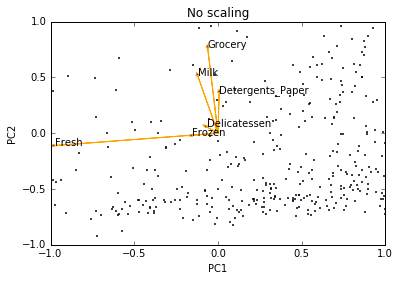

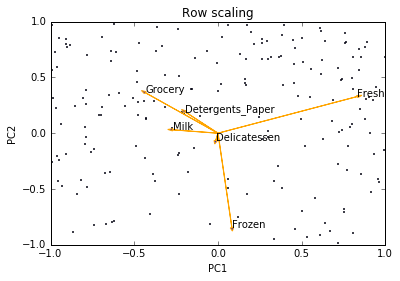

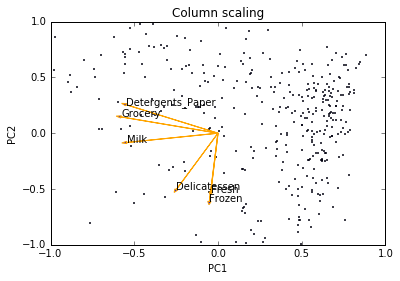

In [6]:
# Do PCA and plot biplots with no scaling, column scaling, and row scaling.
for (dataZ, scaletype) in [(dataN, "No scaling"), (dataR, "Row scaling"), (dataC, "Column scaling")]:
    fBiplot(dataZ, scaletype=scaletype, columnnames=data.columns, whiten=True)

- Each individual point in a bivariate plot shows the projection of a record onto the surface made of the first two principal components (PCs).
- Each "feature line" in a bivariate plot shows a feature's coefficients along the first two PCs, and also shows the first and second PCs' coefficients along the original features.

In [7]:
# Define a function to do PCA and plot its explained variance ratios. (Use n_comp="" for n_compnents=columns_in_dataset.)

def fPCA(dataZ, n_comp, scaletype, columnnames, whiten=True):
    
    # Do PCA.
    pca = PCA(n_components = dataZ.shape[1] if n_comp=="" else n_comp, whiten=True)
    pca.fit_transform(dataZ) if scaletype=="Column scaling" else pca.fit(dataZ)
    zpci = pca.components_
    zpca = pd.DataFrame(zpci)
    zpca.columns = columnnames
    print scaletype + ": Principal components' dependence on original features:"
    print zpca
    
    # Compute proportions of original features in PCs.
    zpcb = pd.DataFrame(abs(zpci.copy()))
    zpcb.columns = columnnames
    zpcb.loc[:, "Fresh":"Delicatessen"] = zpcb.loc[:, "Fresh":"Delicatessen"].div(zpcb.sum(axis=1), axis=0)
    zpcb['MainItem'] = zpcb.idxmax(axis=1)
    print scaletype + ": Principal components' relative proportions:"
    print zpcb
    
    # Compute explained variance ratios (the amount of variance in the data contained in each dimension).
    zevr1 = pd.DataFrame(pca.explained_variance_ratio_)
    zevr2 = pd.DataFrame(pca.explained_variance_ratio_.cumsum())
    zevr = pd.concat([zevr1, zevr2], axis=1)
    zevr.columns = ["EVR", "cumEVR"]
    print scaletype + ": PCA explained variance ratios and their cumulatives:"
    print zevr
    
    # Compute number of significant principal components.
    print scaletype + ": Number of principal components needed to cover 95% variance:"
    print len(zevr.query('cumEVR < 0.95'))
    
    # Plot explained variance ratios and cumulative EVR versus PC numbers.
    plt.figure()
    zcom = np.arange(6)
    plt.bar(zcom, zevr['EVR'], width=0.3, color='r')
    plt.ylabel('Explained variance ratios', color='r')
    plt.xlabel('PC number')
    plt.ylim(0.0, 1.0)
    zaxe = plt.twinx()
    zaxe.plot(zcom, zevr['cumEVR'], color='b')
    zaxe.set_ylabel('Cumulative explained variance', color='b')
    zaxe.set_ylim(0.0, 1.0)
    plt.show()
    print "-" * 100

No scaling: Principal components' dependence on original features:
      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0 -0.976537 -0.121184 -0.061540 -0.152365          0.007054     -0.068105
1 -0.110614  0.515802  0.764606 -0.018723          0.365351      0.057079
2 -0.178557  0.509887 -0.275781  0.714200         -0.204410      0.283217
3 -0.041876 -0.645640  0.375460  0.646292          0.149380     -0.020396
4  0.015986  0.203236 -0.160292  0.220186          0.207930     -0.917077
5 -0.015763  0.033492  0.410939 -0.013289         -0.871284     -0.265417
No scaling: Principal components' relative proportions:
      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen          MainItem
0  0.704173  0.087385  0.044376  0.109869          0.005087      0.049110             Fresh
1  0.060373  0.281524  0.417322  0.010219          0.199408      0.031154           Grocery
2  0.082434  0.235399  0.127320  0.329724          0.094370      0.130753          

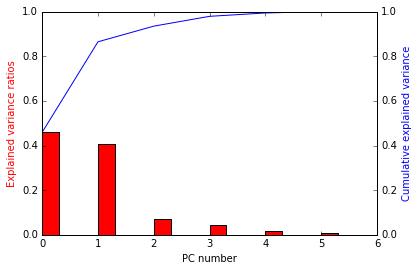

----------------------------------------------------------------------------------------------------
Row scaling: Principal components' dependence on original features:
      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  0.832087 -0.270426 -0.434339  0.083268         -0.196794     -0.013796
1  0.328592  0.030371  0.363239 -0.847180          0.192180     -0.067202
2 -0.009938  0.811212 -0.483957 -0.236009         -0.196564      0.115256
3  0.069763  0.058480  0.478772  0.025509         -0.846260      0.213737
4 -0.167412 -0.312723 -0.222045 -0.228770          0.053648      0.877302
5  0.408248  0.408248  0.408248  0.408248          0.408248      0.408248
Row scaling: Principal components' relative proportions:
      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen          MainItem
0  0.454516  0.147717  0.237252  0.045484          0.107496      0.007536             Fresh
1  0.179680  0.016607  0.198625  0.463253          0.105087      0.03674

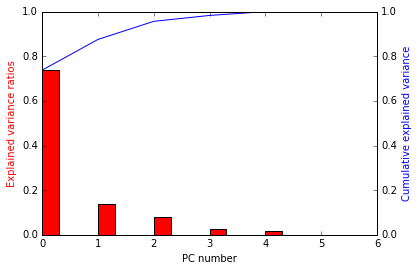

----------------------------------------------------------------------------------------------------
Column scaling: Principal components' dependence on original features:
      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0 -0.042884 -0.545118 -0.579256 -0.051189         -0.548640     -0.248682
1 -0.527932 -0.083168  0.146088 -0.611278          0.255233     -0.504207
2 -0.812257  0.060388 -0.108384  0.178386         -0.136192      0.523904
3 -0.236686 -0.087190  0.105987  0.768683          0.171744     -0.552065
4  0.048683 -0.826579  0.314999  0.027932          0.339640      0.314701
5  0.036025  0.038040 -0.721745  0.015637          0.685894      0.075134
Column scaling: Principal components' relative proportions:
      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen MainItem
0  0.021274  0.270427  0.287362  0.025394          0.272174      0.123368  Grocery
1  0.248099  0.039084  0.068653  0.287267          0.119946      0.236950   Frozen
2

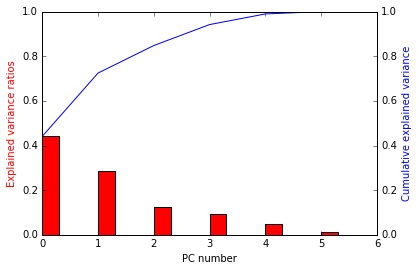

----------------------------------------------------------------------------------------------------


In [8]:
# Do PCA and plot explained variance ratios with no scaling, column scaling, and row scaling.
for (dataZ, scaletype) in [(dataN, "No scaling"), (dataR, "Row scaling"), (dataC, "Column scaling")]:
    fPCA(dataZ, n_comp="", scaletype=scaletype, columnnames=data.columns, whiten=True)

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

#### Answer:
- The variance drops off almost exponentially with dimensions (that is, number of principal components).
- In order to cover 95% variance:
- - 3 principal components are needed if no scaling is applied.
- - 2 principal components plus 1 vector of row-wise totals are needed if row scaling is applied.
- - 4 principal components are needed if column scaling is applied.
- Regarding scaling method, "no scaling" is the best option in this case, because:
- - Row scaling's apparent advantage [of 1 less PC] is lost after considering the need of a vector of row-wise totals.
- - Column scaling needs 2 more principal components than "no scaling", for covering 95% variance.
- Thus, no scaling is the best option in this case.
- I would choose "no scaling" and the first 3 principal components, because:
- - The first 3 principal components cover more than 95% variance and reprsent a "signal".
- - The remaining principal components cover less than 5% variance and represent a "noise".

**3)** What do the dimensions seem to represent? How can you use this information?

#### Answer:
- Each dimension here is a principal component (PC), which is a surface in the 6-dimensional space made of the 6 sale items (Fresh, Milk, Grocery, Frozen, Detergents_Paper, and Delicatessen) as coordinates.
- The first two tables ("No scaling: Principal components' ...") imply that:
- - The first PC is primarily affected by Fresh. It has 70% variance (0.977) due to Fresh.
- - The second PC is primarily affected by Grocery. It has 42% variance (0.765) due to Grocery.
- - The third PC is primarily affected by Frozen. It has 33% variance (0.714) due to Frozen.
- An understanding of the significant (first 3) principal components and their relationships to the sale items helps us understand the line of business and the inter-connection of sale items. This understanding helps us make wise decisions about purchasing and stocking the inventory of the sale items.

### ICA

In [9]:
# Define a function to do ICA. (Use n_comp="" for n_compnents=columns_in_dataset.)

def fICA(dataZ, n_comp, scaletype, columnnames, whiten=True):
    
    # Do ICA.
    ica = FastICA(n_components = dataZ.shape[1] if n_comp=="" else n_comp,
                  whiten=True, max_iter=100, tol=0.01, w_init=None, random_state=1)
    ica.fit_transform(dataZ) if scaletype=="Column scaling" else ica.fit(dataZ)
    zici = ica.components_
    zica = pd.DataFrame(zici)
    zica.columns = columnnames
    print scaletype + ": Independent components' dependence on original features:"
    print zica
    
    # Compute proportions of original features.
    zicb = pd.DataFrame(abs(zici.copy()))
    zicb.columns = columnnames
    zicb.loc[:, "Fresh":"Delicatessen"] = zicb.loc[:, "Fresh":"Delicatessen"].div(zicb.sum(axis=1), axis=0)
    zicb['MainItem'] = zicb.idxmax(axis=1)
    print scaletype + ": Independent components' relative proportions:"
    print zicb
    print "-" * 100

In [11]:
# Do ICA with no scaling, column scaling, and row scaling.
for (dataZ, scaletype) in [(dataN, "No scaling"), (dataR, "Row scaling"), (dataC, "Column scaling")]:
    fICA(dataZ, n_comp=6, scaletype=scaletype, columnnames=data.columns, whiten=True)

No scaling: Independent components' dependence on original features:
          Fresh          Milk       Grocery        Frozen  Detergents_Paper  Delicatessen
0  3.984049e-06 -9.166665e-07 -2.845852e-06 -1.179486e-06      5.785633e-06  3.670171e-07
1  4.969220e-07  1.424886e-06 -2.369673e-07  6.148315e-07      9.026310e-06 -1.757513e-06
2 -1.309849e-07  9.620541e-06 -8.567263e-06 -2.953770e-07      4.805726e-06 -4.883701e-06
3  4.444801e-07  1.172351e-07  9.771053e-07  5.159959e-07     -9.924499e-07 -1.817977e-05
4  3.694469e-07  3.336351e-06  1.177350e-05 -1.621900e-06     -2.593549e-05 -6.498195e-06
5  6.267419e-07  2.136832e-07 -8.425052e-07 -1.107504e-05      6.307690e-07  5.975748e-06
No scaling: Independent components' relative proportions:
      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen          MainItem
0  0.264217  0.060792  0.188733  0.078222          0.383696      0.024340  Detergents_Paper
1  0.036653  0.105100  0.017479  0.045350          0.665783

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

#### Answer:
- In the set of independent components (ICs) with "row scaling", each IC is composed of equal proportions of original features, and thus, all ICs have the same direction in the space of original features. These ICs are statistically not independednt as expected from ICA. This implies that ICA fails in case of "row scaling" or when total of values of all features is same for all records of the dataset. We should, therefore, refrain from "row scaling" while doing ICA.
- The set of ICs with "no scaling" is different from the set of ICs with "column scaling". This implies that it is possible to have multiple sets of ICs. 
- In the set of ICs with "no scaling":
- - The first IC is composed mainly of Detergents_Paper. It consists of: 26% Fresh, 6% Milk, 19% Grocery, 8% Frozen, 38% Detergents_Paper, and 2% Delicatessen.
- - The second IC is composed mainly of Detergents_Paper. It consists of: 4% Fresh, 11% Milk, 2% Grocery, 5% Frozen, 67% Detergents_Paper, and 13% Delicatessen.
- - The third IC is composed mainly of Milk. It consists of: 0% Fresh, 34% Milk, 30% Grocery, 1% Frozen, 17% Detergents_Paper, and 17% Delicatessen.
- - The fourth IC is composed mainly of Delicatessen. It consists of: 2% Fresh, 0% Milk, 5% Grocery, 2% Frozen, 5% Detergents_Paper, and 87% Delicatessen.
- - The fifth IC is composed mainly of Detergents_Paper. It consists of: 1% Fresh, 7% Milk, 24% Grocery, 3% Frozen, 52% Detergents_Paper, and 13% Delicatessen.
- - The sixth IC is composed mainly of Frozen. It consists of: 3% Fresh, 1% Milk, 4% Grocery, 57% Frozen, 3% Detergents_Paper, and 31% Delicatessen.
- The components derived from this ICA can be used for discovering customer groups of statistically independent types. For example, purchases by household-type customers are quite different from purchases by event-organizer-type customers. 

## Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

### Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

#### Answer:

- k-means (KMeans) and Expectation Maximization algorithms are special cases of Gaussian Mixture Model (GMM) algorithms.
- GMM needs many parameters for tuning. KMeans needs only k value for tuning.
- GMM is the fastest method for learning mixture models. KMeans works faster than GMM for certain specific applications.
- GMM is unbiased; it maximizes only the likelihood, and so, will not bias the means towards zero, or bias the cluster sizes to have specific structures that might or might not apply. KMeans is also unbiased, where it is applicable.
- GMM is difficult to implement due to several parameters for tuning. KMeans is easy to implement and apply even on large datasets.
- GMM is scaleable and can be applicable for a variety of applications. KMeans is not so much scaleable as GMM.
- Not all GMM works can be converted into KMeans works. All KMeans works can be generalized into GMM works.
- KMeans method can be used as a preprocessing step (to find a starting configuration) for other algorithms.
- KMeans clustering method has become popular for, and provides starting templates for:
- - Reduction of colors: Reduce the number of colors required to show an image, while preserving the overall appearance quality. This is done by performing a pixel-wise Vector Quantization of the image.
- - Topic classification: Cluster documents by topics using a bag-of-words approach. This is done by using a scipy.sparse matrix to store the features instead of standard numpy arrays.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [12]:
# Import clustering modules.
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [13]:
# Reduce the data to two dimensions using PCA to capture variation. Print upto 10 elements.
reduced_data = PCA(n_components=2, whiten=True).fit_transform(dataN)
print reduced_data[:10]

[[-0.05066239  0.13161505]
 [ 0.34502287  0.33556674]
 [ 0.37738285  0.21406486]
 [-0.07718708 -0.5212911 ]
 [-0.83067886 -0.17928035]
 [ 0.2155776  -0.07967954]
 [ 0.05576966 -0.16710073]
 [ 0.34874672  0.11866355]
 [ 0.52313722 -0.18311407]
 [ 0.37595155  1.11903068]]


In [14]:
# Implement your clustering algorithm here, and fit it to the reduced data for visualization.
# The visualizer below assumes your clustering object is named 'clusters'.

# Define KMeans and GMM algorithms with different cluster-sizes.
clusterz = []
clusterz.append( KMeans(n_clusters=2, init='k-means++', n_init=10).fit(reduced_data) )
clusterz.append( KMeans(n_clusters=3, init='k-means++', n_init=10).fit(reduced_data) )
clusterz.append( KMeans(n_clusters=4, init='k-means++', n_init=10).fit(reduced_data) )
clusterz.append( GMM(n_components=2, covariance_type='diag', n_init=1).fit(reduced_data) )
clusterz.append( GMM(n_components=3, covariance_type='diag', n_init=1).fit(reduced_data) )
clusterz.append( GMM(n_components=4, covariance_type='diag', n_init=1).fit(reduced_data) )
# params='wmc',init_params='wmc',random_state=None,thresh=None,tol=0.001,min_covar=0.001,n_iter=100,verbose=0

# Print thse alogorithms.
for i in range(0,6):
    print clusterz[i]

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)
KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)
KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)
GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)
GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)
GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=4, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, to

In [15]:
# Create the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

In [16]:
# Obtain labels for each point in mesh. Use last trained model.
Zy = []
for i in range(0,6):
    Zy.append( clusterz[i].predict(np.c_[xx.ravel(), yy.ravel()]) )

In [17]:
# Compute and print centroids: centers for KMeans and means for GMM.
centroidz = []
for i in [0,1,2]:
    centroidz.append( clusterz[i].cluster_centers_ )
    print "Centroids: Cluster centers for KMeans: " + str(i+2) + " clusters:"
    print centroidz[i]
for i in [3,4,5]:    
    centroidz.append( clusterz[i].means_ )
    print "Centroids: Cluster means for GMM: " + str(i-1) + " clusters:"
    print centroidz[i]

Centroids: Cluster centers for KMeans: 2 clusters:
[[-1.8774321   0.10112193]
 [ 0.32542156 -0.0175278 ]]
Centroids: Cluster centers for KMeans: 3 clusters:
[[ 0.32398252 -0.25421161]
 [-1.86890029 -0.36902956]
 [ 0.10439573  2.12063212]]
Centroids: Cluster centers for KMeans: 4 clusters:
[[ 0.27606834 -0.40980069]
 [-1.88774966 -0.36229652]
 [-1.13306214  5.12306113]
 [ 0.44511156  1.05103642]]
Centroids: Cluster means for GMM: 2 clusters:
[[ 0.25680368 -0.24813473]
 [-0.85106495  0.82233544]]
Centroids: Cluster means for GMM: 3 clusters:
[[ 0.55039413  0.37036156]
 [-1.41677388  0.86006388]
 [ 0.02064228 -0.53090193]]
Centroids: Cluster means for GMM: 4 clusters:
[[ 0.17955642 -0.55240277]
 [ 0.55835485  0.46008322]
 [-1.22239264 -0.27631773]
 [-0.74454425  2.88256246]]


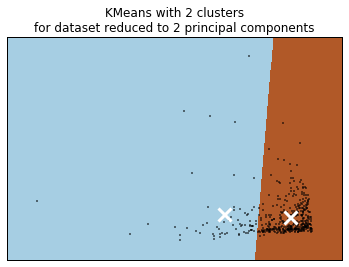

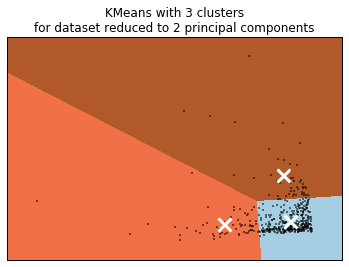

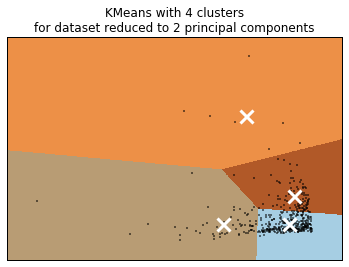

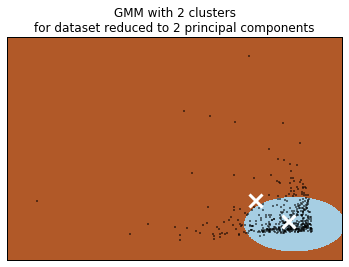

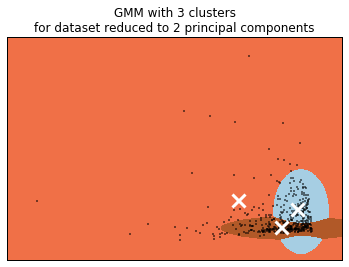

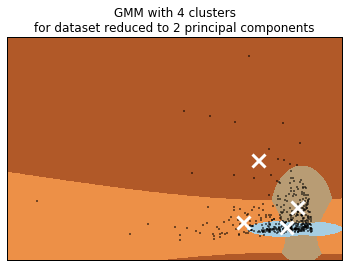

In [18]:
# Define labels for plots.
labelz = ['KMeans with 2 clusters','KMeans with 3 clusters','KMeans with 4 clusters',
          'GMM with 2 clusters','GMM with 3 clusters','GMM with 4 clusters']

# Plot the KMeans and GMM results.
for i in range(0,6):
    Zzx = Zy[i].reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Zzx, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired, aspect='auto', origin='lower')
    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    plt.scatter(centroidz[i][:, 0], centroidz[i][:, 1], marker='x', s=169, linewidths=3, color='w', zorder=10)
    plt.title(labelz[i] + '\nfor dataset reduced to 2 principal components')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [19]:
# Interpret the centroids in terms of original features.
znum = [2,3,4,2,3,4]
zlab = []
zval = []
for i in range(0,6):
    for j in range(0,znum[i]):
        zadd = [labelz[i], str(j+1)]
        zlab.append(zadd)
        zadd = map(int, PCA(n_components=2, whiten=True).fit(dataN).inverse_transform(centroidz[i][j]))
        zval.append(zadd)
        
zlab = pd.DataFrame(zlab)
zlab.columns = ["Method","Cluster#"]
zval = pd.DataFrame(zval)
zval.columns = data.columns
zout = pd.merge(zlab, zval, right_index=True, left_index=True)
print zout

                    Method Cluster#  Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0   KMeans with 2 clusters        1  35388   9343    10365    6719              3156          3234
1   KMeans with 2 clusters        2   7946   5181     7532    2439              2833          1228
2   KMeans with 3 clusters        1   8279   3712     5353    2495              1791          1066
3   KMeans with 3 clusters        2  35908   6409     6027    6808              1088          2904
4   KMeans with 3 clusters        3   7866  18810    27401    2389             12224          2891
5   KMeans with 4 clusters        1   9087   2820     3958    2624              1102          1001
6   KMeans with 4 clusters        2  36135   6480     6104    6844              1116          2925
7   KMeans with 4 clusters        3  19370  39391    56034    4131             25326          6037
8   KMeans with 4 clusters        4   5022  11634    17280    1964              7547          1858
9      GMM

**7)** What are the central objects in each cluster? Describe them as customers.

#### Answer:
- The above table provides an interpretation of the centroid of each cluster in terms of the original features. For example:
- - One cluster in KMeans with 2 clusters represents a clustomer who buys Fresh of {{znum[1]}}, Milk of 9343, Grocery of 10365, Frozen of 6719, Detergents_Paper of 3156, and Delicatessen of 3234.
- - One cluster in GMM with 4 clusters represents a clustomer who buys Fresh of 37666, Milk of 5977, Grocery of 6369, Frozen of 5521, Detergents_Paper of 1554, and Delicatessen of 2401.

### Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

#### Answer:
- Scaling: "No scaling" proved to be the best. "Row scaling" was ambiguous. "Column scaling" was not necessary.
- PCA vs ICA: PCA gave more insight than ICA. PCA could reduce the number of components. ICA was not necessary.
- KMeans versus GMM: KMeans seemed more straightforward than GMM. KMeans produced distinct clusters. GMM produced indistinct clusters.

**9)** How would you use that technique to help the company design new experiments?

#### Answer:
- Let us say that the original dataset was analyzed by using PCA and KMeans with 3 clusters.
- As shown in the above table:
- - Customers in one cluster buy a lot of Grocery (worth 27401). Let us call them "Grocery-type" customers.
- - Customers in another cluster buy a lot of Fresh (worth 359058). Let us call them "Fresh-type" customers.
- - Customers in the other cluster buy a mixed variety. Let us call them "Mixed-type" customers.
- Let us say that "Grocery-type" customers are the most profitable for this business. 
- A new A/B test experiment may be designed as follows.
- - Subset the original dataset corresponding to "Grocerty-type" customers.
- - Apply PCA to the sub dataset.
- - Create a reduced dataset using 2 principal components.
- - Apply KMeans with 2 or 3 clusters to the reduced dataset.
- - Analyze these sub clusters.
- Likely oucome of this A/B testing may be"
- - One sub cluster buys a lot of Fresh.
- - Another sub cluster buys a lot of Frozen.

**10)** How would you use that data to help you predict future customer needs?

#### Answer:
- Let us say that the original dataset was analyzed by using PCA and KMeans with 3 clusters.
- Let us say the "Mixed-type" customers are not profitable for this business.
- Then, the business can be made more profitable as follows.
- - Advertise to attract more "Grocery-type" and "Fresh-type" customers and less "Mixed-type" customers.
- - Buy more items for "Grocery-type" and "Fresh-type" customers and no items for "Mixed-type" customers.
- - Arrange the inventory to suit for "Grocery-type" and "Fresh-type" customers.
- - Keep and schedule personnel to cater to the needs of "Grocery-type" and "Fresh-type" customers.